In [5]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
restaurants = pd.read_csv("C://Users//User//Downloads//Restaurants.csv")
orders = pd.read_csv("C://Users//User//Downloads//Orders.csv")
customers = pd.read_csv("C://Users//User//Downloads//Customers.csv")

In [13]:
#Cleaning the data by handling missing values

restaurants.fillna('Unknown', inplace=True)
orders.dropna(subset=['Order_ID'], inplace=True)
customers.fillna('N/A', inplace=True)

In [17]:
#checking orders info 

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   object 
 1   Restaurant_ID           1000 non-null   object 
 2   Order_Date              1000 non-null   object 
 3   Expected_Delivery_Time  1000 non-null   int64  
 4   Actual_Delivery_Time    1000 non-null   int64  
 5   Total_Amount            1000 non-null   float64
 6   Order_Status            1000 non-null   object 
 7   Payment_Method          1000 non-null   object 
 8   Dish_Name               1000 non-null   object 
 9   Customer_ID             1000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 78.3+ KB


In [25]:
#merging three data for getting a unified data view

merged_data = orders.merge(customers, on='Customer_ID').merge(restaurants, on='Restaurant_ID')
merged_data.head()

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,...,Customer_Age_Group,Customer_Rating,Customer_Name,Name,Location,Cuisine_Types,Avg_Cost_for_Two,Ratings,Reviews_Count,Operational_Hours
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,...,26-35,3.1,Diya Kapoor,Wasabi by Morimoto,Pune,Mexican,221,4.1,396,10:00-23:00
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,...,26-35,4.2,Vivaan Khanna,Al Jawahar,Kolkata,"Indian, Chinese",230,3.2,392,09:00-23:00
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,...,26-35,4.7,Ananya Desai,Faasos,Kolkata,Continental,807,4.7,268,11:00-22:30
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,...,18-25,4.4,Isha Reddy,China Garden,Mumbai,Fast Food,498,3.2,93,00:00-23:59
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,...,18-25,3.8,Ishaan Mehta,Mamagoto,Hyderabad,American,454,4.8,373,11:00-22:00


In [33]:
#Top Cuisines by Order count

top_cuisines = merged_data['Cuisine_Types'].value_counts().head(10)
print(top_cuisines)

Cuisine_Types
American           215
Continental        176
Indian, Chinese    170
Japanese           117
Italian, Indian     93
Thai                82
Fast Food           76
Mexican             71
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_1764\2451783589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')


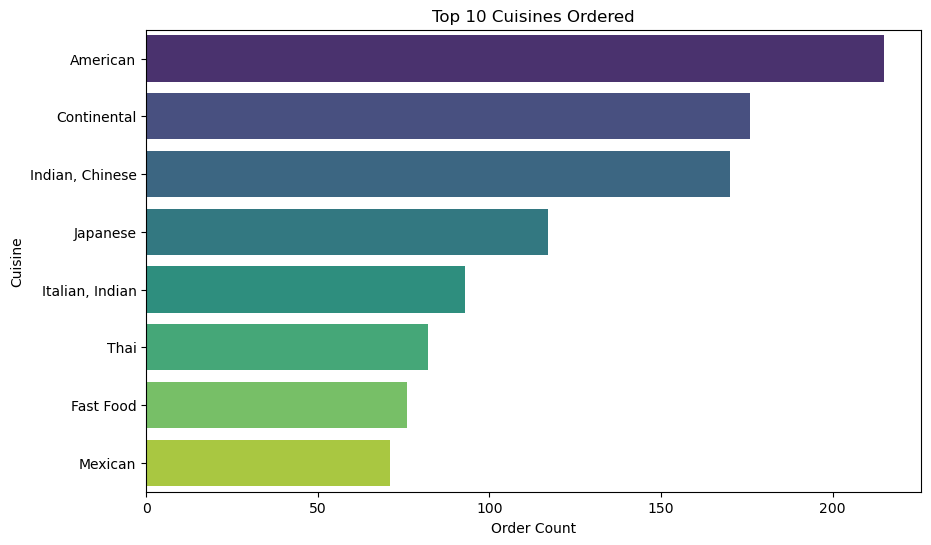

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 10 Cuisines Ordered')
plt.xlabel('Order Count')
plt.ylabel('Cuisine')
plt.show()

In [35]:
#Orders with respect to time

merged_data['Order_Date'] = pd.to_datetime(merged_data['Order_Date'])
merged_data.head()

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,...,Customer_Age_Group,Customer_Rating,Customer_Name,Name,Location,Cuisine_Types,Avg_Cost_for_Two,Ratings,Reviews_Count,Operational_Hours
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,...,26-35,3.1,Diya Kapoor,Wasabi by Morimoto,Pune,Mexican,221,4.1,396,10:00-23:00
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,...,26-35,4.2,Vivaan Khanna,Al Jawahar,Kolkata,"Indian, Chinese",230,3.2,392,09:00-23:00
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,...,26-35,4.7,Ananya Desai,Faasos,Kolkata,Continental,807,4.7,268,11:00-22:30
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,...,18-25,4.4,Isha Reddy,China Garden,Mumbai,Fast Food,498,3.2,93,00:00-23:59
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,...,18-25,3.8,Ishaan Mehta,Mamagoto,Hyderabad,American,454,4.8,373,11:00-22:00


In [47]:
monthly_orders_df = monthly_orders.reset_index()  
monthly_orders_df.columns = ['Month', 'Order_Count']

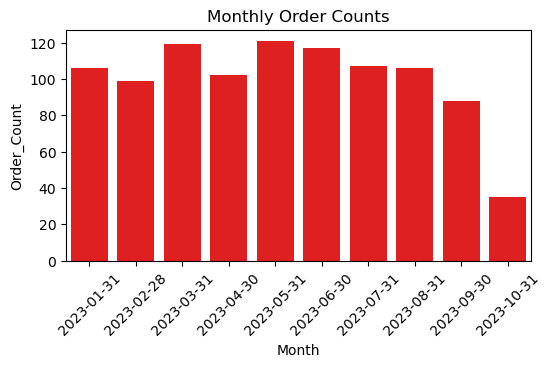

In [55]:
#order count with respect to months

plt.figure(figsize=(6, 3))
sns.barplot(x="Month", y="Order_Count", data=monthly_orders_df, color="red")
plt.xticks(rotation=45)
plt.title("Monthly Order Counts")
plt.show()

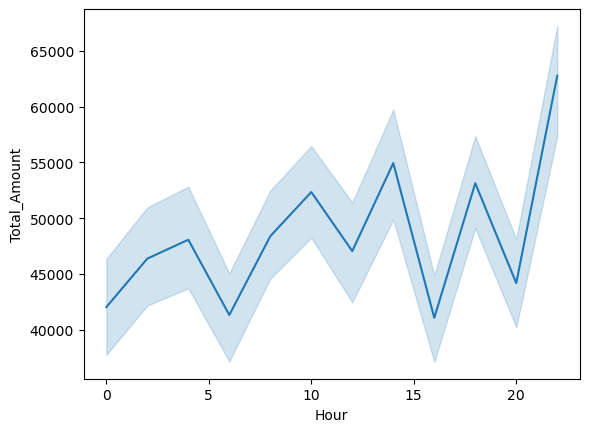

In [57]:
#Total Amount with respect to time

merged_data["Hour"] = merged_data["Order_Date"].dt.strftime("%H")
merged_data["Hour"] = merged_data["Hour"].astype("int")
merged_data= merged_data.sort_values(by = "Hour" )
sns.lineplot(x = "Hour", y = "Total_Amount", data = merged_data, estimator = "sum")
plt.show()

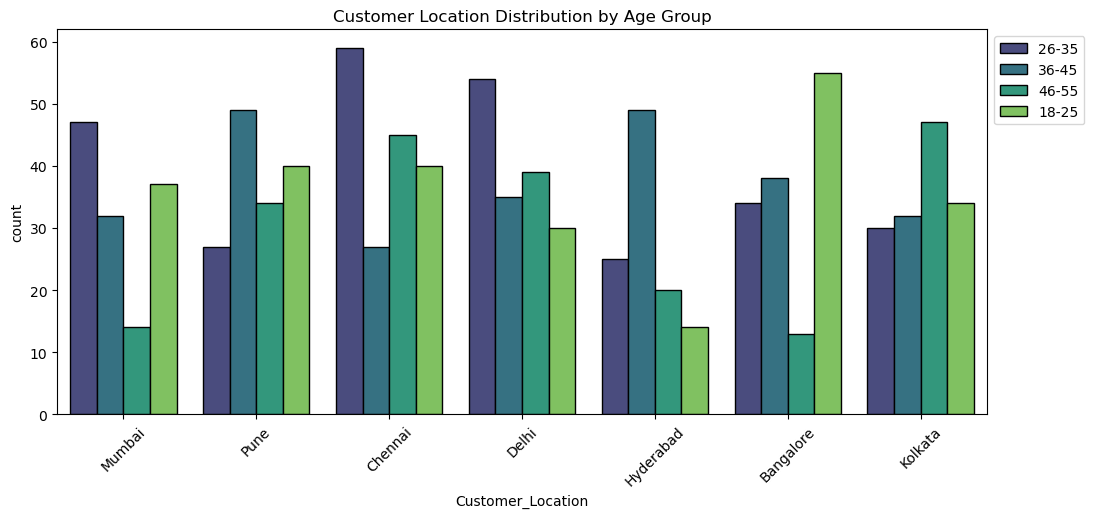

In [61]:
# Plotting Customer Location Counts by Age Group

plt.figure(figsize=(12, 5))  
sns.countplot(x="Customer_Location", data=merged_data, 
              hue="Customer_Age_Group", palette="viridis", edgecolor="black")
plt.legend(bbox_to_anchor=(1, 1))  
plt.title("Customer Location Distribution by Age Group")
plt.xticks(rotation=45)  
plt.show()

In [65]:
#Customer Insights 
#By plotting top 10 customers by order count

top_customers = merged_data['Customer_Name'].value_counts().head(10)
print(top_customers)

Customer_Name
Dev Patel       74
Kavya Gupta     64
Diya Kapoor     64
Aryan Kumar     63
Arjun Yadav     61
Mira Rao        60
Ishaan Mehta    57
Isha Reddy      54
Riya Jain       54
Aanya Patel     53
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_1764\1929370896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='flare')


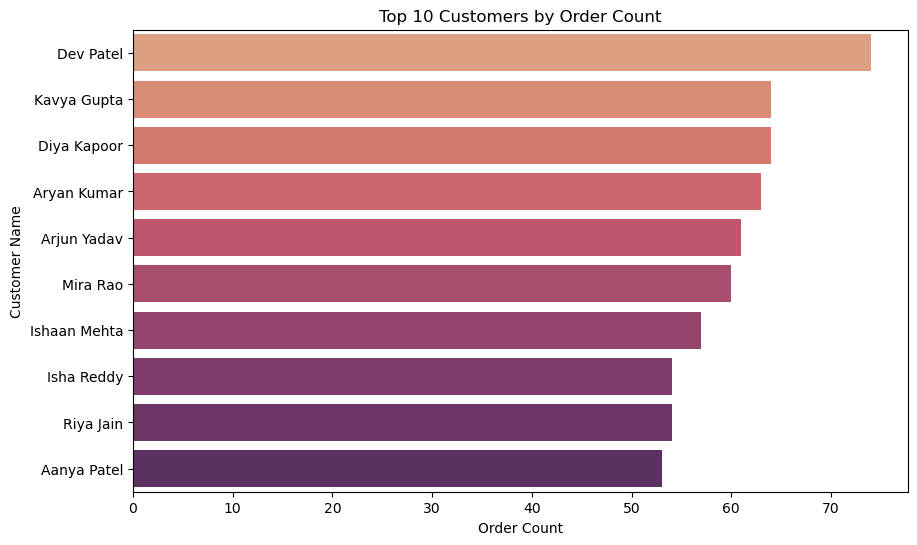

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='flare')
plt.title('Top 10 Customers by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Customer Name')
plt.show()

In [77]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_ID      100 non-null    object 
 1   Name               100 non-null    object 
 2   Location           100 non-null    object 
 3   Cuisine_Types      100 non-null    object 
 4   Avg_Cost_for_Two   100 non-null    int64  
 5   Ratings            100 non-null    float64
 6   Reviews_Count      100 non-null    int64  
 7   Operational_Hours  100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [79]:
#Top 10 Most Popular Restaurants

top_restaurants = merged_data['Name'].value_counts().head(10)
print(top_restaurants)

Name
Faasos               47
Zitomer              42
Mahesh Lunch Home    41
Byblos               32
Olive Bistro         32
Biryani By Kilo      30
Domino's Pizza       30
Smoke House Deli     29
ITC Grand Chola      28
Al Jawahar           28
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_1764\4172455731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='magma')


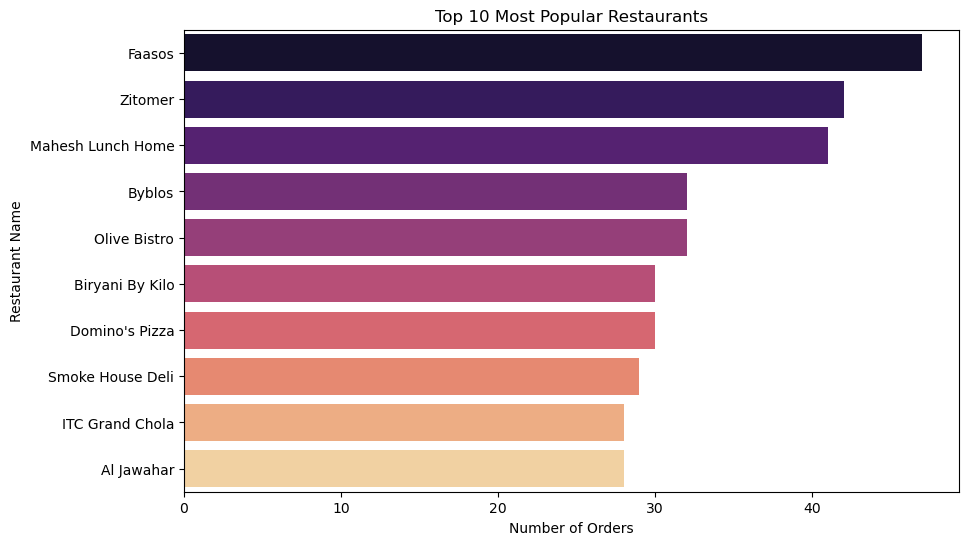

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='magma')
plt.title('Top 10 Most Popular Restaurants')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()

In [85]:
#Average Ratings of Top 10 Restaurants

top_restaurant_ratings = merged_data.groupby('Name')['Ratings'].mean().nlargest(10)
print(top_restaurant_ratings)

Name
Imly                       4.900000
Indian Accent              4.900000
Pizza Hut                  4.900000
Smoke BBQ                  4.900000
Dindigul Thalappakatti     4.800000
Mamagoto                   4.800000
The Burger Club            4.800000
Cafe Coffee Day            4.700000
Sagar Ratna                4.609524
The Great Kebab Factory    4.509091
Name: Ratings, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_1764\1841831734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_restaurant_ratings.values, y=top_restaurant_ratings.index, palette='cool')


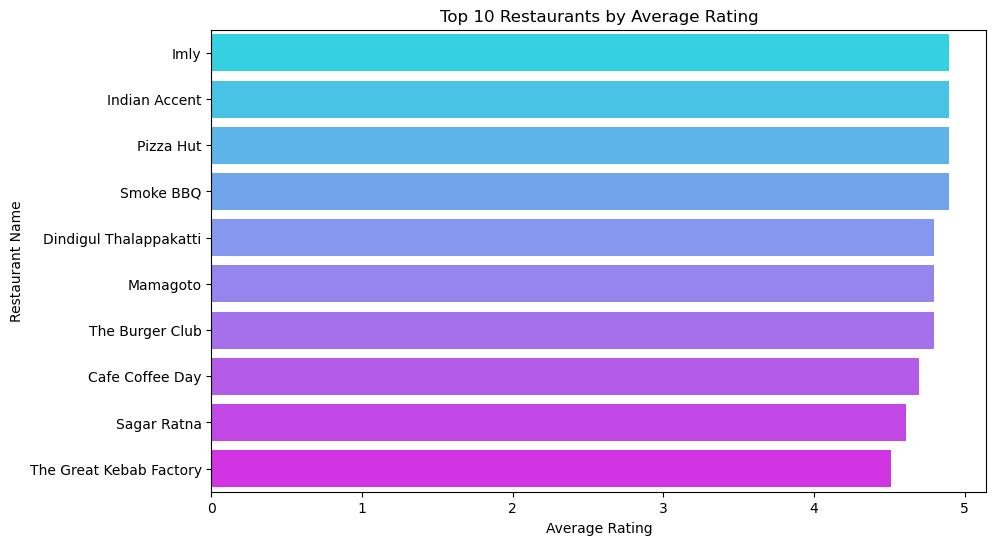

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_restaurant_ratings.values, y=top_restaurant_ratings.index, palette='cool')
plt.title('Top 10 Restaurants by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Name')
plt.show()